In [1]:
# Create first network with Keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

/Users/som/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load pima indians dataset
dataset = numpy.loadtxt("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:700,0:8]
Y = dataset[:700,8]
XTEST = dataset[700:,0:8]
YTEST = dataset[700:,8]

In [3]:
print(X.shape)
print(Y.shape)
print(XTEST.shape)
print(YTEST.shape)
print(X[0:3,])
print(Y[0:3])
print(XTEST[0:3,])
print(YTEST[0:3])


(700, 8)
(700,)
(68, 8)
(68,)
[[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]]
[1. 0. 1.]
[[  2.    122.     76.     27.    200.     35.9     0.483  26.   ]
 [  6.    125.     78.     31.      0.     27.6     0.565  49.   ]
 [  1.    168.     88.     29.      0.     35.      0.905  52.   ]]
[0. 1. 1.]


In [4]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


/Users/som/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 437
Trainable params: 437
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
# Fit the model
history = model.fit(X, Y, epochs=100, batch_size=5, validation_data = (XTEST, YTEST), verbose=2)

Train on 700 samples, validate on 68 samples
Epoch 1/100
 - 2s - loss: 0.6635 - acc: 0.6543 - val_loss: 0.6975 - val_acc: 0.6029
Epoch 2/100
 - 0s - loss: 0.6435 - acc: 0.6557 - val_loss: 0.7018 - val_acc: 0.6029
Epoch 3/100
 - 0s - loss: 0.6313 - acc: 0.6557 - val_loss: 0.7238 - val_acc: 0.6029
Epoch 4/100
 - 0s - loss: 0.6321 - acc: 0.6543 - val_loss: 0.6581 - val_acc: 0.6029
Epoch 5/100
 - 0s - loss: 0.6209 - acc: 0.6557 - val_loss: 0.6499 - val_acc: 0.6029
Epoch 6/100
 - 0s - loss: 0.6073 - acc: 0.6557 - val_loss: 0.6505 - val_acc: 0.6029
Epoch 7/100
 - 0s - loss: 0.6126 - acc: 0.6543 - val_loss: 0.6703 - val_acc: 0.6029
Epoch 8/100
 - 0s - loss: 0.6012 - acc: 0.6557 - val_loss: 0.6847 - val_acc: 0.6029
Epoch 9/100
 - 0s - loss: 0.5936 - acc: 0.6557 - val_loss: 0.6424 - val_acc: 0.6029
Epoch 10/100
 - 0s - loss: 0.6002 - acc: 0.6543 - val_loss: 0.6487 - val_acc: 0.6618
Epoch 11/100
 - 0s - loss: 0.6046 - acc: 0.6586 - val_loss: 0.6502 - val_acc: 0.6029
Epoch 12/100
 - 0s - loss: 0.

Epoch 97/100
 - 0s - loss: 0.4639 - acc: 0.7757 - val_loss: 0.5439 - val_acc: 0.7941
Epoch 98/100
 - 0s - loss: 0.4600 - acc: 0.7886 - val_loss: 0.4771 - val_acc: 0.7647
Epoch 99/100
 - 0s - loss: 0.4599 - acc: 0.7900 - val_loss: 0.5022 - val_acc: 0.7500
Epoch 100/100
 - 0s - loss: 0.4664 - acc: 0.7600 - val_loss: 0.5169 - val_acc: 0.7647


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


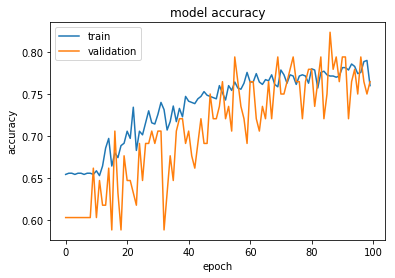

In [6]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

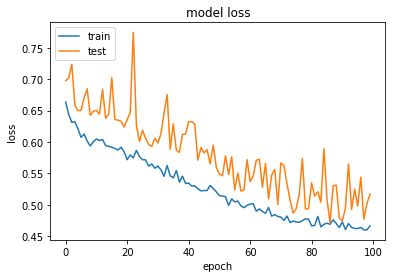

In [7]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [8]:
# evaluate the model on training dataset
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# evaluate the model on validation dataset
scores = model.evaluate(XTEST, YTEST)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

700/700 [==============================] - 0s 37us/step

acc: 77.86%
68/68 [==============================] - 0s 104us/step

acc: 76.47%


In [9]:
# calculate predictions
predictions = model.predict(XTEST)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
y_pred = model.predict(XTEST)
y_pred = y_pred.reshape(len(y_pred))
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(YTEST, predictions)
precision = precision_score(YTEST, predictions)
recall = recall_score(YTEST, predictions)
f1score = f1_score(YTEST, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

Accuracy: 76.47%
Precision: 72.00%
Recall: 66.67%
F1-score: 0.69
